In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#for neural network
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.models import Sequential, Model, load_model
from keras.layers import  Conv1D, MaxPooling1D, Conv2D, MaxPooling2D, Flatten, Reshape, Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#import keras_tuner as kt
#for visualising neural network
from keras.utils import plot_model

# Importing Data

In [ ]:
Vx = pd.read_excel(r'/content/X1_2d.xlsx', header=None)
print(Vx.shape)
Vx.head()

(2000, 21)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.262450,0.295608,0.326179,0.336112,0.390381,0.486186,0.561427,0.760142,0.808377,0.994028,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
1,0.000000,0.021747,0.024287,0.091087,0.091329,0.128114,0.237584,0.247202,0.314967,0.383035,...,0.468530,0.512017,0.542879,0.568091,0.572286,0.688301,0.799812,0.903531,0.976851,1
2,0.097382,0.101820,0.136128,0.169058,0.250484,0.378114,0.536421,0.750164,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
3,0.147636,0.198480,0.214883,0.225105,0.240041,0.248907,0.272599,0.291418,0.367609,0.470712,...,0.578315,0.764955,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
4,0.000000,0.017936,0.022071,0.047653,0.056751,0.071771,0.114469,0.134870,0.138619,0.162644,...,0.237803,0.284251,0.369232,0.440950,0.460440,0.620451,0.670391,0.864665,0.925050,1


In [ ]:
Vy = pd.read_excel(r'/content/Y1_2d.xlsx', header=None)
print(Vy.shape)
Vy.head()

(2000, 21)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.237646,0.371151,0.637877,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.0000,1.000000,1.000000,1
1,0.092731,0.129868,0.200575,0.407838,0.504153,0.630146,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.0000,1.000000,1.000000,1
2,0.000000,0.047075,0.135211,0.185226,0.190946,0.211833,0.213134,0.276487,0.311037,0.407363,...,0.507634,0.508015,0.601475,0.68343,0.735647,0.836173,0.9029,0.906702,0.950314,1
3,0.722302,0.845067,0.859313,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.0000,1.000000,1.000000,1
4,0.576808,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.0000,1.000000,1.000000,1


In [ ]:
disp = pd.read_excel(r'/content/output_values_2d.xlsx', header=None)
print(disp.shape)
disp.head()

(2000, 1)


,0
0,-0.000230
1,-0.000323
2,-0.000359
3,-0.000231
4,-0.000282


In [ ]:
# Define the custom R2 metric function
def r2_metric(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - (SS_res / (SS_tot + tf.keras.backend.epsilon()))

# 1D CNN

In [ ]:
input_data = np.concatenate((Vx, Vy), axis=1)
input_data = input_data.reshape([2000,42,1])
input_data.shape

(2000, 42, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(input_data, disp, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 42, 1), (400, 42, 1), (1600, 1), (400, 1))

In [ ]:
# Instantiate the MinMaxScaler
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

## Building the model


In [ ]:
# Clear existing model
tf.keras.backend.clear_session()
#define model
network1d = Sequential()
network1d.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(42,1)))
network1d.add(MaxPooling1D(pool_size=2))

network1d.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
network1d.add(MaxPooling1D(pool_size=2))
network1d.add(Flatten())

network1d.add(Dense(units = 256, activation='relu'))
network1d.add(Dense(units = 256, activation='relu'))
network1d.add(Dense(units = 1))
network1d.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 20, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 18, 32)            3104      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 9, 32)             0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense (Dense)               (None, 256)               7

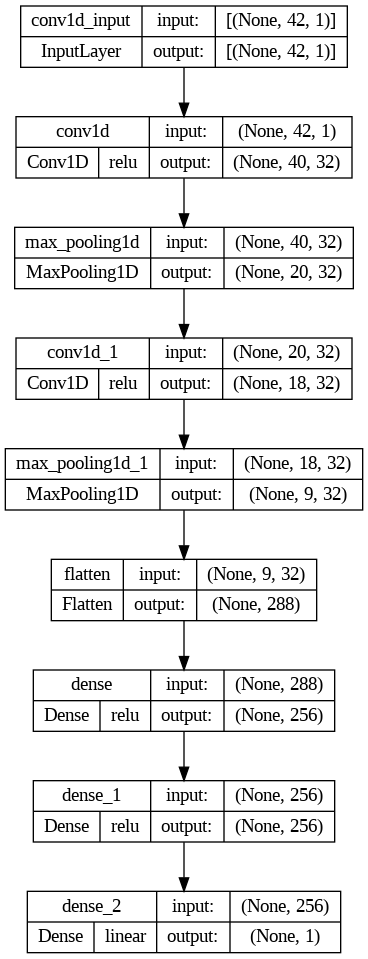

In [ ]:
plot_model(network1d, show_shapes=True, show_layer_names=True, show_layer_activations=True)

## Training the model

In [ ]:
network1d.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse',metrics=[r2_metric,'mape'] )

In [ ]:
#20 = 0.0001
history = network1d.fit(X_train, y_train_scaled, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
40/40 [==============================] - 3s 24ms/step - loss: 0.0530 - r2_metric: -0.0969 - mape: 267999.5625 - val_loss: 0.0154 - val_r2_metric: 0.6851 - val_mape: 36.0306
Epoch 2/10
40/40 [==============================] - 1s 15ms/step - loss: 0.0102 - r2_metric: 0.7942 - mape: 123054.5781 - val_loss: 0.0045 - val_r2_metric: 0.9051 - val_mape: 21.4212
Epoch 3/10
40/40 [==============================] - 0s 12ms/step - loss: 0.0026 - r2_metric: 0.9456 - mape: 57775.7695 - val_loss: 0.0012 - val_r2_metric: 0.9755 - val_mape: 8.3589
Epoch 4/10
40/40 [==============================] - 0s 9ms/step - loss: 8.8964e-04 - r2_metric: 0.9816 - mape: 30388.3594 - val_loss: 6.2945e-04 - val_r2_metric: 0.9868 - val_mape: 6.0386
Epoch 5/10
40/40 [==============================] - 0s 9ms/step - loss: 5.2037e-04 - r2_metric: 0.9891 - mape: 28942.0508 - val_loss: 3.8057e-04 - val_r2_metric: 0.9920 - val_mape: 5.4087
Epoch 6/10
40/40 [==============================] - 0s 11ms/step - loss: 3.6

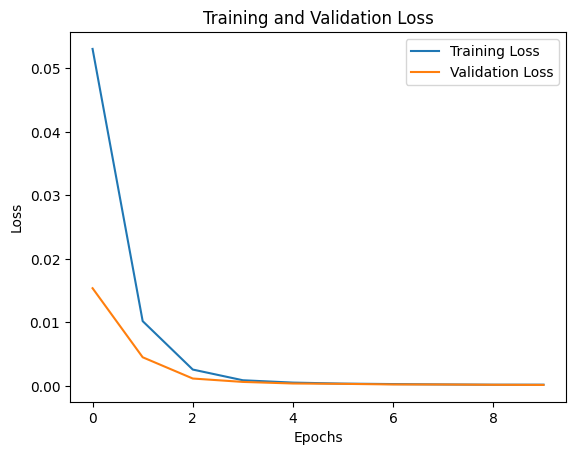

In [ ]:
# Plot epochs vs. loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Model Validation


In [ ]:
test_loss, test_r2, test_mape = network1d.evaluate(X_test, y_test_scaled,verbose=0)
y_testp = network1d.predict(X_test,verbose=0)
print("Test Loss:", test_loss)
print("Test R2-score:", test_r2)
print("Test mape:", test_mape)

Test Loss: 0.00021890955395065248
Test R2-score: 0.995785653591156
Test mape: 3.8578903675079346


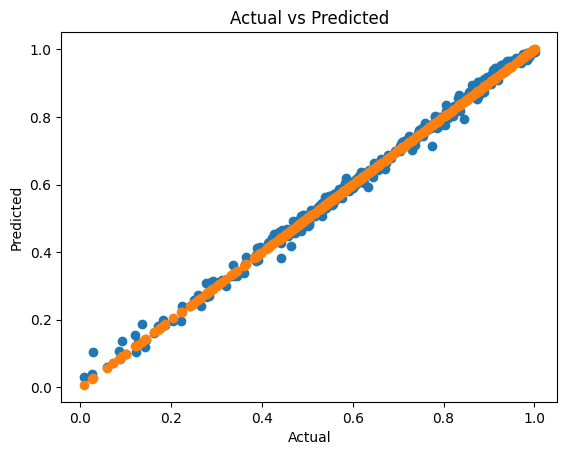

In [ ]:
plt.scatter(y_test_scaled,y_testp, label='Obtained')
plt.scatter(y_test_scaled,y_test_scaled, label='Expected')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

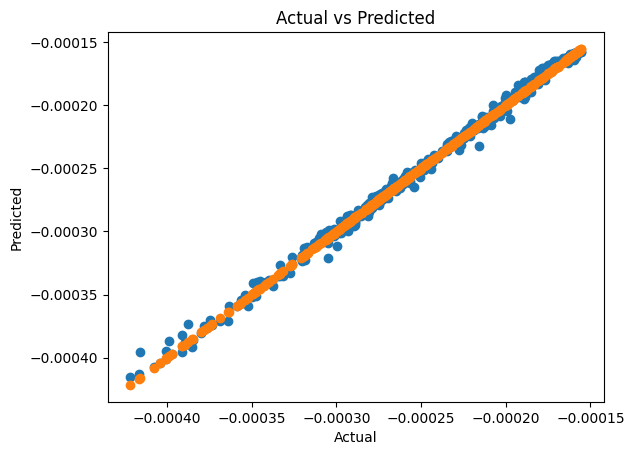

In [ ]:
plt.scatter(y_test,scaler.inverse_transform(y_testp), label='Obtained')
plt.scatter(y_test,y_test, label='Expected')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# 2D CNN

In [ ]:
input_data = np.einsum('ij,ik->ijk', Vx, Vy)
input_data = input_data.reshape([2000,21,21,1])
input_data.shape

(2000, 21, 21, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(input_data, disp, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 21, 21, 1), (400, 21, 21, 1), (1600, 1), (400, 1))

In [ ]:
# Instantiate the MinMaxScaler
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

## Building the model


In [ ]:
# Clear existing model
tf.keras.backend.clear_session()
#define model
network = Sequential()
#network.add(Conv2D(32, (3, 3), input_shape=(21, 21, 1), activation='relu', padding='same', strides=(1, 1)))
network.add(Conv2D(32, (3,3), input_shape = (21,21,1), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units = 256, activation='relu'))
network.add(Dense(units = 256, activation='relu'))
network.add(Dense(units = 1))
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 19, 19, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 9, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense (Dense)               (None, 256)               7

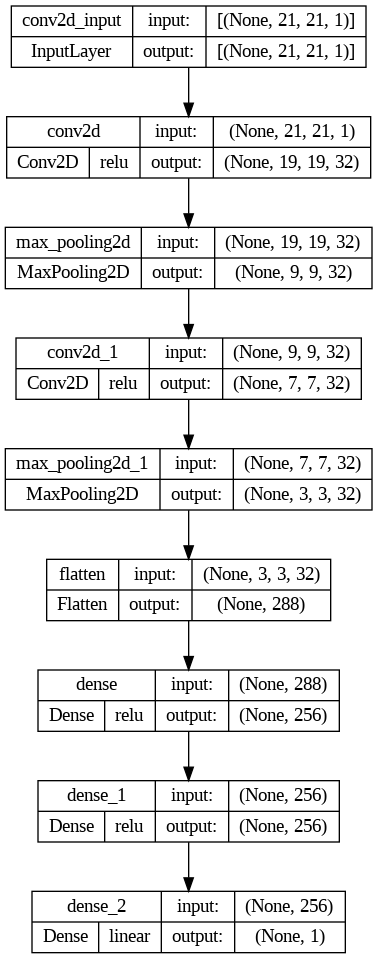

In [ ]:
plot_model(network, show_shapes=True, show_layer_names=True, show_layer_activations=True)

## Training the model

In [ ]:
network.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse',metrics=[r2_metric,'mape'] )

In [ ]:
#20 = 0.0001
history = network.fit(X_train, y_train_scaled, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 3s 33ms/step - loss: 0.1635 - r2_metric: -2.4950 - mape: 78836.9531 - val_loss: 0.0230 - val_r2_metric: 0.5016 - val_mape: 32.8598
Epoch 2/20
40/40 [==============================] - 1s 15ms/step - loss: 0.0146 - r2_metric: 0.6878 - mape: 73068.1797 - val_loss: 0.0084 - val_r2_metric: 0.8202 - val_mape: 21.6436
Epoch 3/20
40/40 [==============================] - 1s 18ms/step - loss: 0.0079 - r2_metric: 0.8314 - mape: 73250.3828 - val_loss: 0.0052 - val_r2_metric: 0.8871 - val_mape: 17.0412
Epoch 4/20
40/40 [==============================] - 1s 16ms/step - loss: 0.0051 - r2_metric: 0.8892 - mape: 69927.6406 - val_loss: 0.0039 - val_r2_metric: 0.9161 - val_mape: 14.3603
Epoch 5/20
40/40 [==============================] - 1s 16ms/step - loss: 0.0038 - r2_metric: 0.9173 - mape: 68956.7031 - val_loss: 0.0030 - val_r2_metric: 0.9348 - val_mape: 12.9779
Epoch 6/20
40/40 [==============================] - 1s 16ms/step - loss: 0.0028 - r2_metr

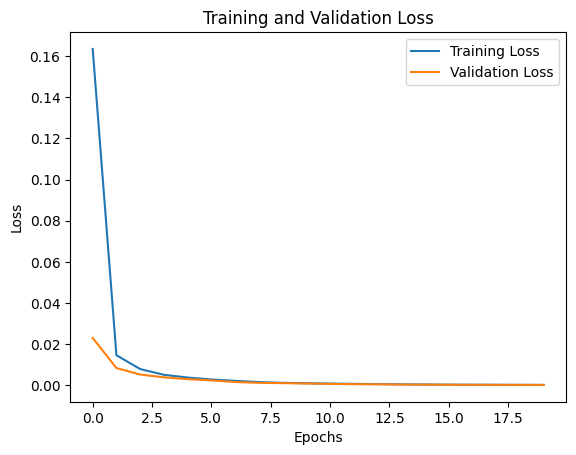

In [ ]:
# Plot epochs vs. loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Model Validation


In [ ]:
test_loss, test_r2, test_mape = network.evaluate(X_test, y_test_scaled,verbose=0)
y_testp = network.predict(X_test,verbose=0)
print("Test Loss:", test_loss)
print("Test R2-score:", test_r2)
print("Test mape:", test_mape)

Test Loss: 0.00023009275901131332
Test R2-score: 0.995597779750824
Test mape: 2.844590187072754


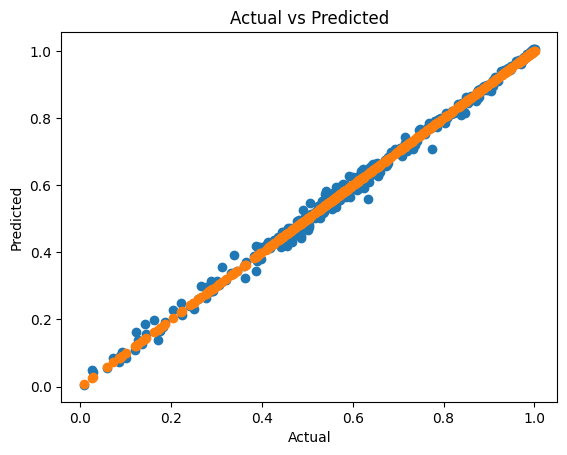

In [ ]:
plt.scatter(y_test_scaled,y_testp, label='Obtained')
plt.scatter(y_test_scaled,y_test_scaled, label='Expected')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

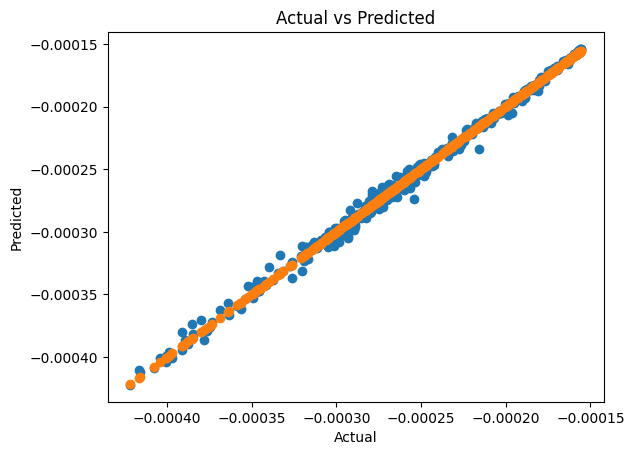

In [ ]:
plt.scatter(y_test,scaler.inverse_transform(y_testp), label='Obtained')
plt.scatter(y_test,y_test, label='Expected')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()